TensorFlow version: 2.18.0
GPU Available: False
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 784)
Test data shape: (10000, 784)

Training model with sigmoid activation...


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5244 - loss: 1.6785 - val_accuracy: 0.9023 - val_loss: 0.4484
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9068 - loss: 0.3852 - val_accuracy: 0.9346 - val_loss: 0.2451
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9384 - loss: 0.2300 - val_accuracy: 0.9483 - val_loss: 0.1842
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9540 - loss: 0.1677 - val_accuracy: 0.9573 - val_loss: 0.1510
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9644 - loss: 0.1300 - val_accuracy: 0.9614 - val_loss: 0.1302
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9719 - loss: 0.1045 - val_accuracy: 0.9654 - val_loss: 0.1161
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9766 - loss: 0.0861 - val_accuracy: 0.9676 - val_loss: 0.1060
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9809 - loss: 0.0718 - val_accuracy: 0.

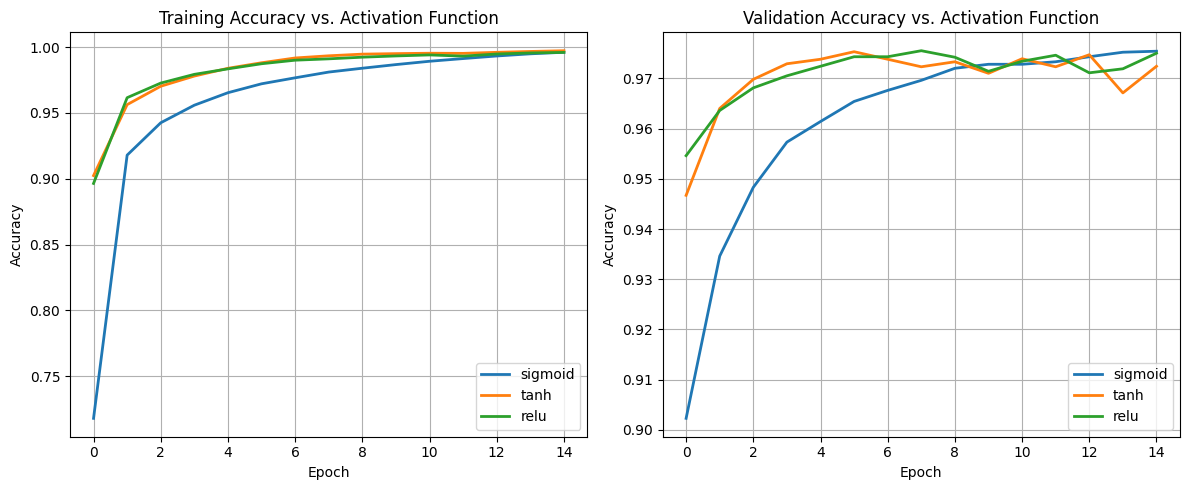

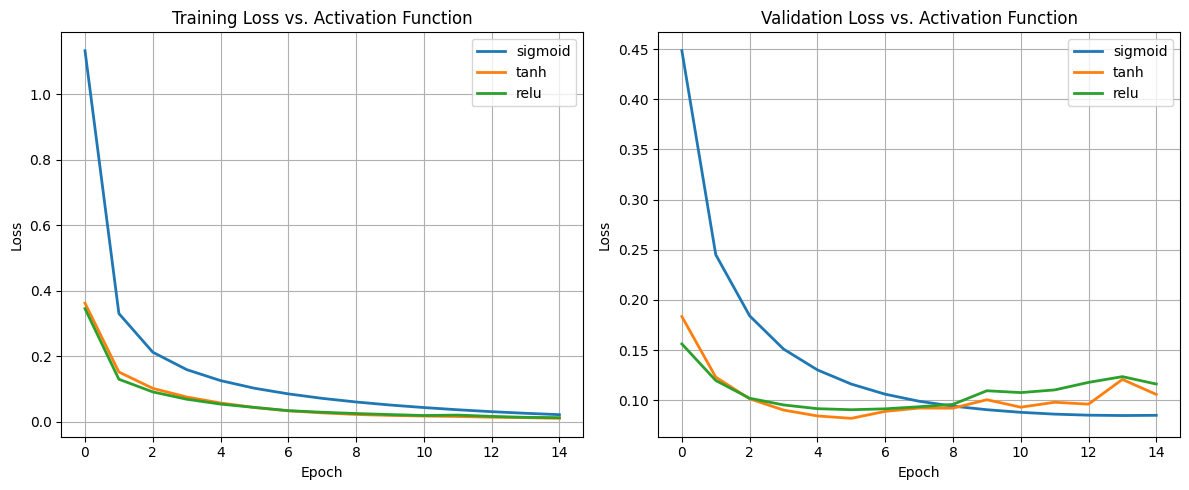

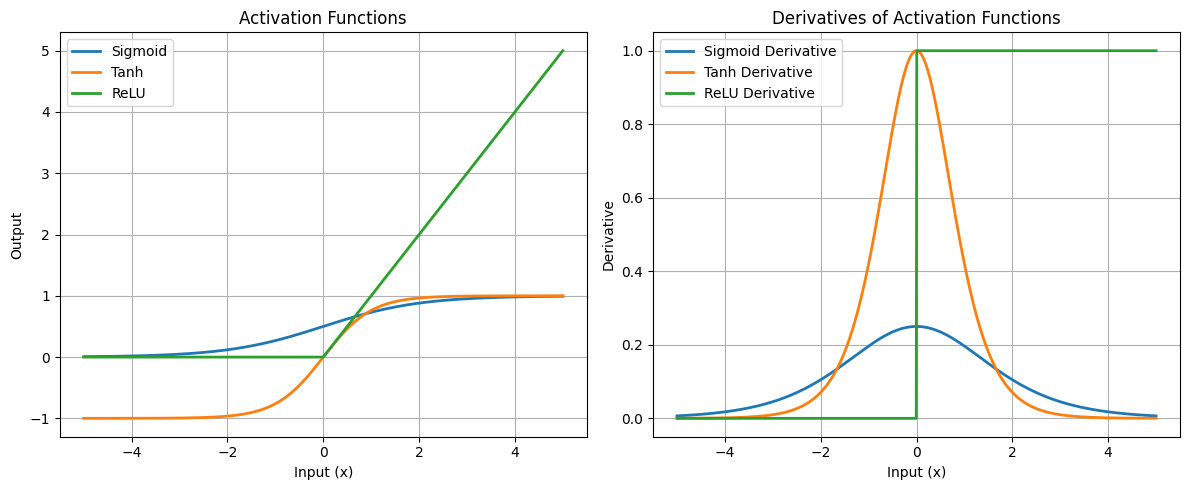

### Analysis: Vanishing Gradient Problem

- Sigmoid and Tanh activations have small gradients for large |x| values,
  leading to vanishing gradients in deep networks.
- ReLU has a constant gradient of 1 for positive inputs, which preserves gradient flow.
- As seen in training plots, ReLU trains faster and reaches better accuracy
  compared to sigmoid and tanh.



In [20]:
# Deep Learning Assignment - Question 1.1

# Activation Functions: sigmoid, tanh, ReLU
# Demonstrate vanishing gradient problem and how ReLU solves it

# ============================== #
# Imports and Setup
# ============================== #
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import time

np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)
print("GPU Available:", len(tf.config.list_physical_devices('GPU')) > 0)

# ============================== #
# Data Preparation
# ============================== #
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# ============================== #
# Model Creation and Training
# ============================== #
def create_model(activation):
    model = Sequential([
        Dense(128, activation=activation, input_shape=(784,)),
        Dense(64, activation=activation),
        Dense(32, activation=activation),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

activations = ['sigmoid', 'tanh', 'relu']
histories = {}
training_times = {}

for activation in activations:
    print(f"\nTraining model with {activation} activation...")
    model = create_model(activation)
    start_time = time.time()

    history = model.fit(
        x_train, y_train,
        epochs=15,
        batch_size=128,
        validation_data=(x_test, y_test),
        verbose=1
    )

    end_time = time.time()
    training_time = end_time - start_time

    histories[activation] = history.history
    training_times[activation] = training_time

    print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"Training time: {training_time:.2f} seconds")

# ============================== #
# Accuracy Visualization
# ============================== #
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for activation in activations:
    plt.plot(histories[activation]['accuracy'], label=activation, linewidth=2)
plt.title('Training Accuracy vs. Activation Function')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for activation in activations:
    plt.plot(histories[activation]['val_accuracy'], label=activation, linewidth=2)
plt.title('Validation Accuracy vs. Activation Function')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ============================== #
# Loss Visualization
# ============================== #
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for activation in activations:
    plt.plot(histories[activation]['loss'], label=activation, linewidth=2)
plt.title('Training Loss vs. Activation Function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for activation in activations:
    plt.plot(histories[activation]['val_loss'], label=activation, linewidth=2)
plt.title('Validation Loss vs. Activation Function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ============================== #
# Activation Function Derivatives
# ============================== #
x = np.linspace(-5, 5, 1000)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, sigmoid(x), label='Sigmoid', linewidth=2)
plt.plot(x, np.tanh(x), label='Tanh', linewidth=2)
plt.plot(x, relu(x), label='ReLU', linewidth=2)
plt.title('Activation Functions')
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, sigmoid_derivative(x), label='Sigmoid Derivative', linewidth=2)
plt.plot(x, tanh_derivative(x), label='Tanh Derivative', linewidth=2)
plt.plot(x, relu_derivative(x), label='ReLU Derivative', linewidth=2)
plt.title('Derivatives of Activation Functions')
plt.xlabel('Input (x)')
plt.ylabel('Derivative')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ============================== #
# Final Analysis
# ============================== #
print("### Analysis: Vanishing Gradient Problem")
print("""
- Sigmoid and Tanh activations have small gradients for large |x| values,
  leading to vanishing gradients in deep networks.
- ReLU has a constant gradient of 1 for positive inputs, which preserves gradient flow.
- As seen in training plots, ReLU trains faster and reaches better accuracy
  compared to sigmoid and tanh.
""")
